In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
paris = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_DataSets/Paris_Clean.csv',
                   encoding='utf8')

In [4]:
paris_nf = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_DataSets/Paris_NFeatures.csv',
                   encoding='utf8')

In [5]:
def new_dataset(df_old, df_nf):
    
    df_old.drop(['Unnamed: 0','host_id','room_id','accommodates','latitude','longitude','collected'], axis=1, inplace=True)
    df_old.sort_values('neighborhood', inplace=True)
    df_old = df_old.reset_index()
    df = pd.DataFrame()
    for row in range(df_nf.shape[0]):
        
        tmp_df = df_old[df_old['neighborhood'] == df_nf['neighborhood'][row]]
        tmp_df['review_count'] = df_nf['review_count'][row]
        tmp_df['host_count'] = df_nf['host_count'][row]
        tmp_df['rest_count'] = df_nf['rest_count'][row]
        tmp_df['metrostn_count'] = df_nf['metrostn_count'][row]
        tmp_df['dist_arprt'] = df_nf['dist_arprt'][row]
        df = df.append(tmp_df, ignore_index=True)
        df.drop('index', axis=1, inplace=True)
    return df
    
    

In [6]:
def new_dataset1(df_old, df_nf):
    
    df_old.drop(['Unnamed: 0','host_id','room_id','accommodates','latitude','longitude','collected'], axis=1, inplace=True)
    df_old.sort_values('neighborhood', inplace=True)
    df_old = df_old.reset_index()
    df = pd.DataFrame()
    for row in range(df_nf.shape[0]):
        
        tmp_df = df_old[df_old['neighborhood'] == df_nf['neighborhood'][row]]
        tmp_df['reviews_count'] = df_nf['reviews_count'][row]
        tmp_df['host_count'] = df_nf['host_count'][row]
        tmp_df['rest_count'] = df_nf['rest_count'][row]
        tmp_df['metrostn_count'] = df_nf['metrostn_count'][row]
        tmp_df['dist_arprt'] = df_nf['dist_arprt'][row]
        df = df.append(tmp_df, ignore_index=True)
        df.drop('index', axis=1, inplace=True)
    return df

In [7]:
df_paris = new_dataset(paris, paris_nf)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

In [8]:
cols_paris = df_paris.columns.tolist()
cols_paris = cols_paris[:11] + [cols_paris[-2]]+ [cols_paris[-3]] + cols_paris[-1:]
df_paris = df_paris[cols_paris]

In [9]:
df_paris = df_paris[df_paris['price'] <= 1000]

In [10]:
#df_paris['price'] = df_paris.price.map(lambda x: x - np.mean(df_paris.price))
df_paris['city'] = 'paris'
df_paris.head(2)

,bathrooms,bedrooms,bhk,dist_arprt,host_count,metrostn_count,minstay,neighborhood,overall_satisfaction,price,rest_count,reviews,review_count,room_type,city
0,1.0,1.0,1.0,0.19109,478,6,2.0,Amerique,5.0,93.0,1,7,3682,Entire home/apt,paris
1,1.0,1.0,1.0,0.19109,478,6,2.0,Amerique,4.5,73.0,1,31,3682,Entire home/apt,paris


In [11]:
barcelona = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_DataSets/Barcelona_Clean.csv',
                   encoding='utf8')

In [12]:
barcelona_nf = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_DataSets/Barcelona_NFeatures.csv',
                   encoding='utf8')

In [13]:
df_barcelona = new_dataset1(barcelona, barcelona_nf)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

In [14]:
df_barcelona.rename(columns ={'reviews_count':'review_count'},inplace=True)

In [15]:
df_barcelona = df_barcelona[df_barcelona['price'] <= 1000]
#df_barcelona['price'] = df_barcelona.price.map(lambda x: x - np.mean(df_barcelona.price))


In [16]:
df_barcelona['city'] = 'barcelona'
df_barcelona.head(2)

,bathrooms,bedrooms,bhk,dist_arprt,host_count,metrostn_count,minstay,neighborhood,overall_satisfaction,price,rest_count,reviews,review_count,room_type,city
0,1.0,0.0,1.0,0.128496,3498,6,2.0,Ciutat Vella,4.0,67.0,75,27,93672,Entire home/apt,barcelona
1,1.0,1.0,1.0,0.128496,3498,6,1.0,Ciutat Vella,4.5,135.0,75,4,93672,Entire home/apt,barcelona


In [17]:
berlin = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_DataSets/Berlin_Clean.csv',
                   encoding='utf8')

In [18]:
berlin_nf = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_DataSets/Berlin_NFeatures.csv',
                   encoding='utf8')

In [19]:
df_berlin = new_dataset(berlin, berlin_nf)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

In [20]:
cols_berlin = df_berlin.columns.tolist()
cols_berlin = cols_berlin[:11] + [cols_berlin[-2]]+ [cols_berlin[-3]] + cols_berlin[-1:]
df_berlin = df_berlin[cols_berlin]

In [21]:
df_berlin = df_berlin[df_berlin['price'] <= 1000]
#df_berlin['price'] = df_berlin.price.map(lambda x: x - np.mean(df_berlin.price))


In [22]:
df_berlin['city'] = 'berlin'
df_berlin.head(2)

,bathrooms,bedrooms,bhk,dist_arprt,host_count,metrostn_count,minstay,neighborhood,overall_satisfaction,price,rest_count,reviews,review_count,room_type,city
0,8.0,10.0,10.0,0.057015,1206,30,1.0,Charlottenburg-Wilmersdorf,5.0,80.0,9,1,11850,Entire home/apt,berlin
1,1.0,2.0,2.0,0.057015,1206,30,3.0,Charlottenburg-Wilmersdorf,4.0,104.0,9,1,11850,Entire home/apt,berlin


In [23]:
copenhagen = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_DataSets/Copenhagen_Clean.csv',
                   encoding='utf8')

In [24]:
copenhagen_nf = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_DataSets/Copenhagen_NFeatures.csv',
                   encoding='utf8')

In [25]:
df_copenhagen = new_dataset1(copenhagen, copenhagen_nf)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

In [26]:
df_copenhagen.rename(columns ={'reviews_count':'review_count'},inplace=True)

In [27]:
df_copenhagen = df_copenhagen[df_copenhagen['price'] <= 1000]
#df_copenhagen['price'] = df_copenhagen.price.map(lambda x: x - np.mean(df_copenhagen.price))


In [49]:
df_copenhagen['city'] = 'copenhagen'
df_copenhagen.head(2)

,bathrooms,bedrooms,bhk,dist_arprt,host_count,metrostn_count,minstay,neighborhood,overall_satisfaction,price,rest_count,reviews,review_count,room_type,city
0,1.0,2.0,2.0,0.051848,1048,5,2.0,Amager East,5.0,155.0,0,17,7378,Entire home/apt,copenhagen
1,1.0,1.0,1.0,0.051848,1048,5,3.0,Amager East,5.0,93.0,0,10,7378,Entire home/apt,copenhagen


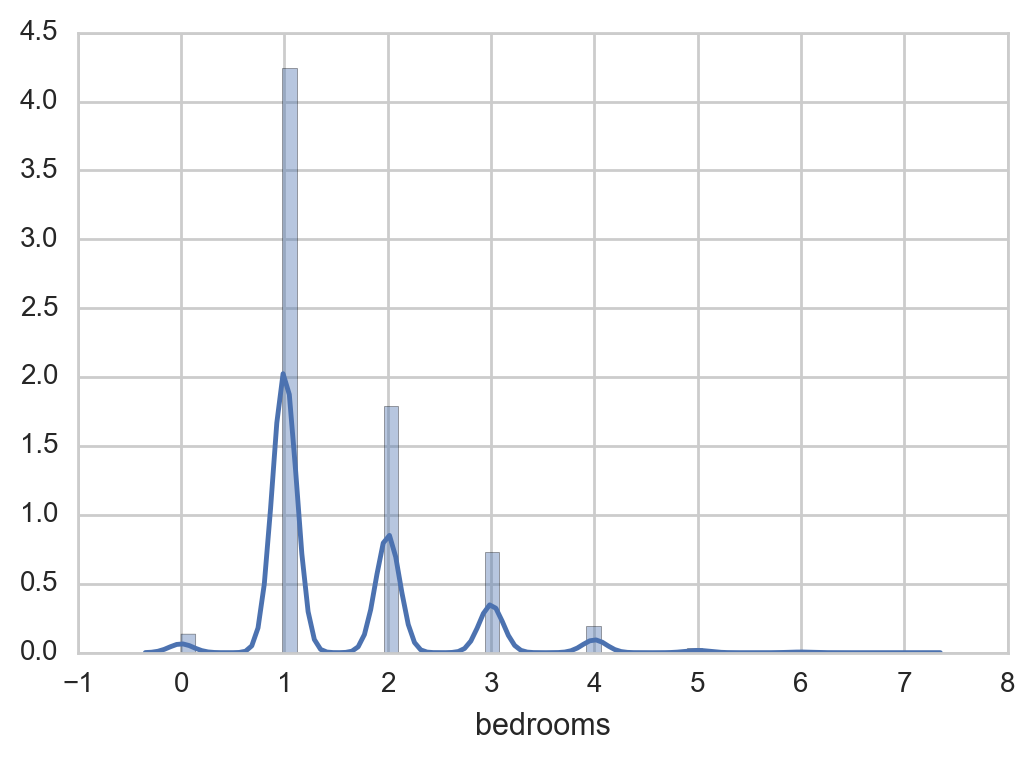

In [48]:
sns.distplot(df_copenhagen.bedrooms)

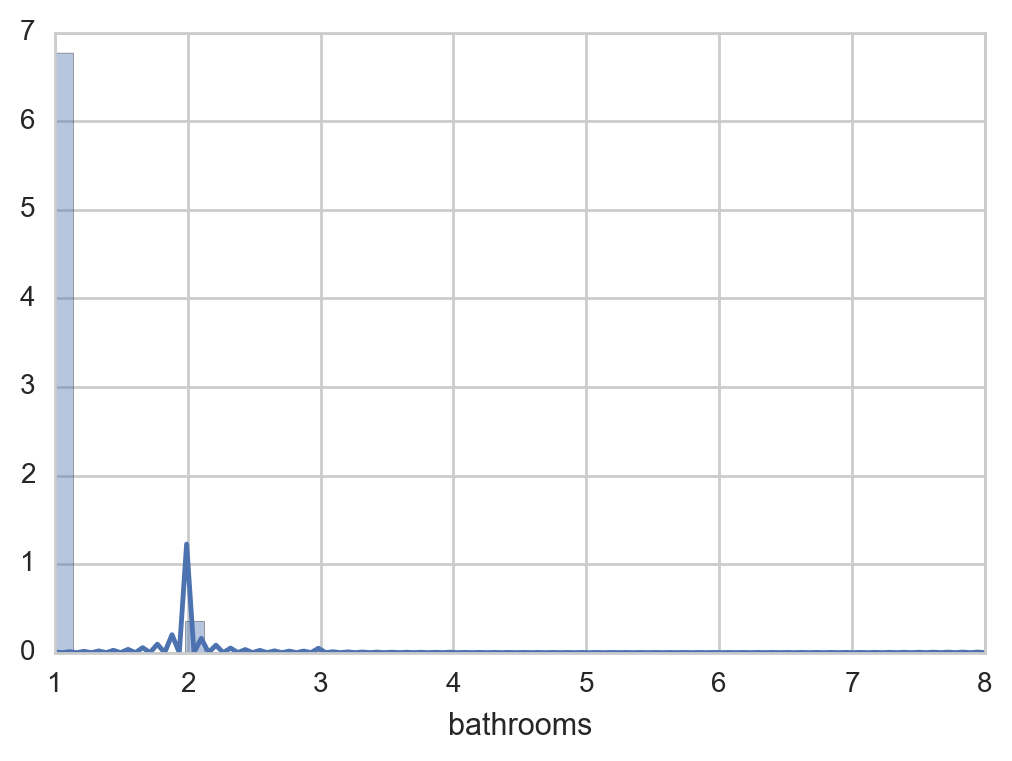

In [50]:
sns.distplot(df_copenhagen.bathrooms)

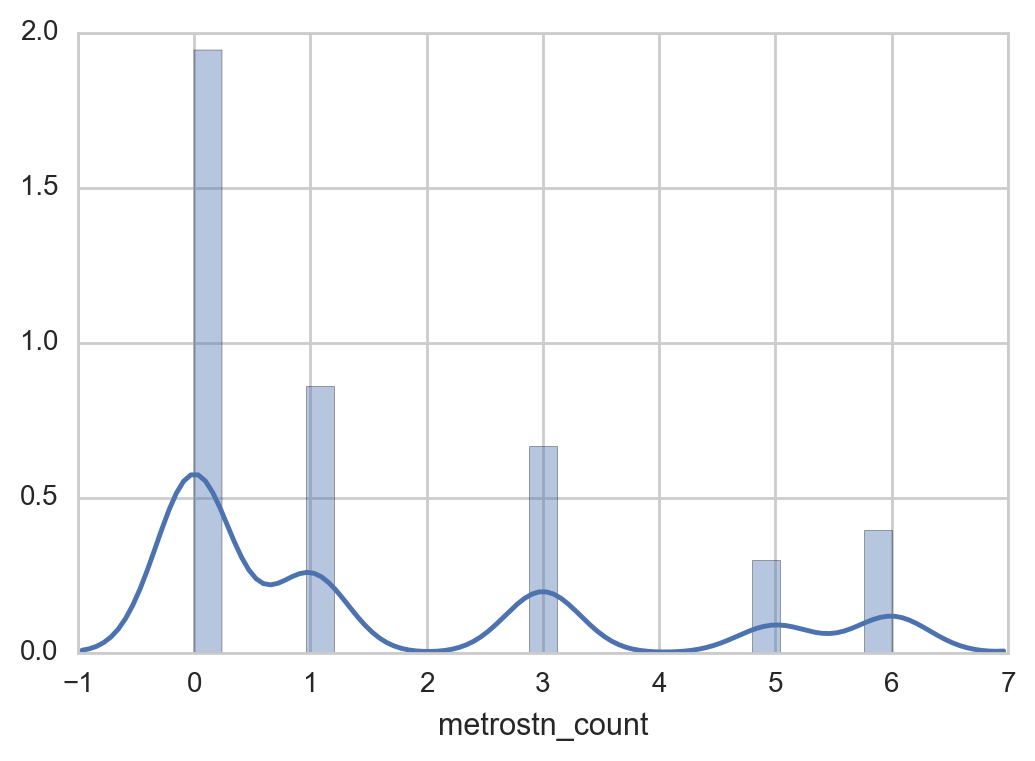

In [51]:
sns.distplot(df_copenhagen.metrostn_count)

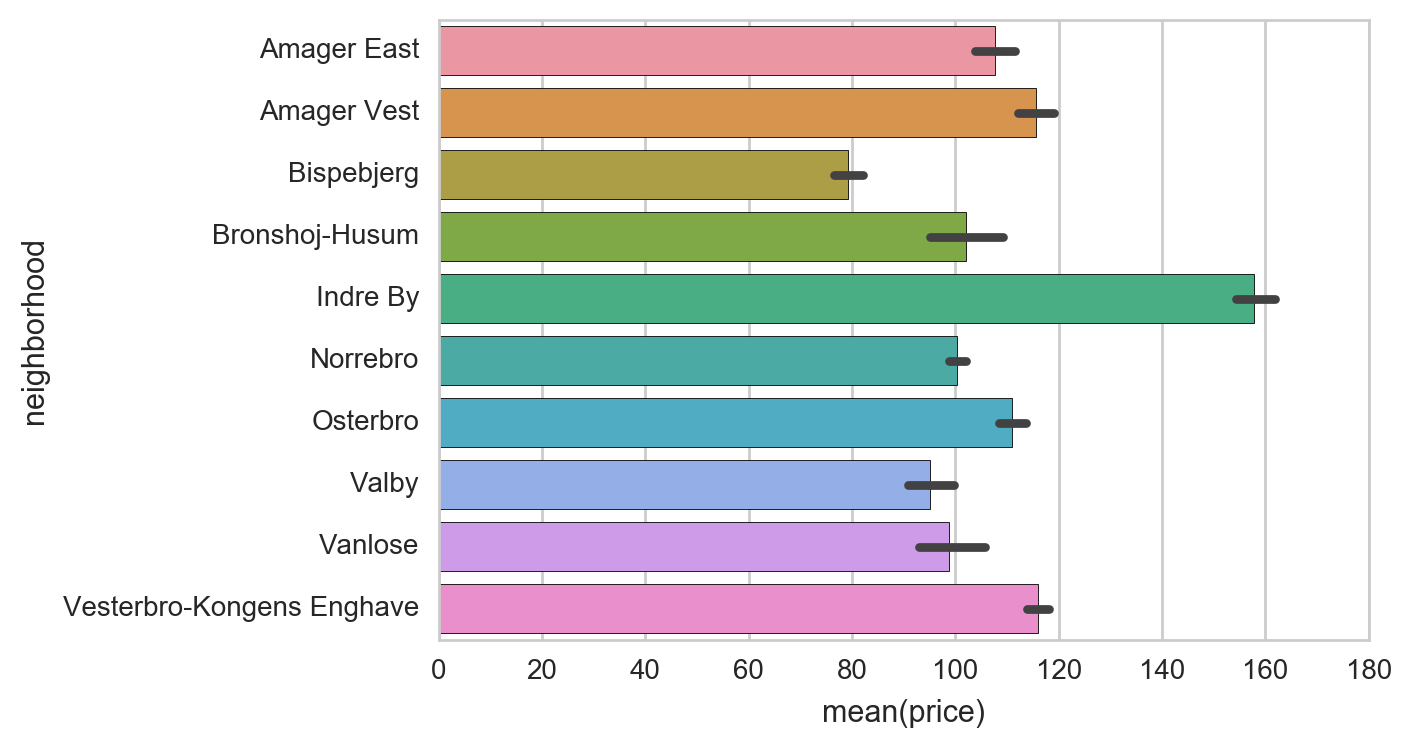

In [56]:
sns.barplot(x = df_copenhagen.price, y = df_copenhagen.neighborhood)

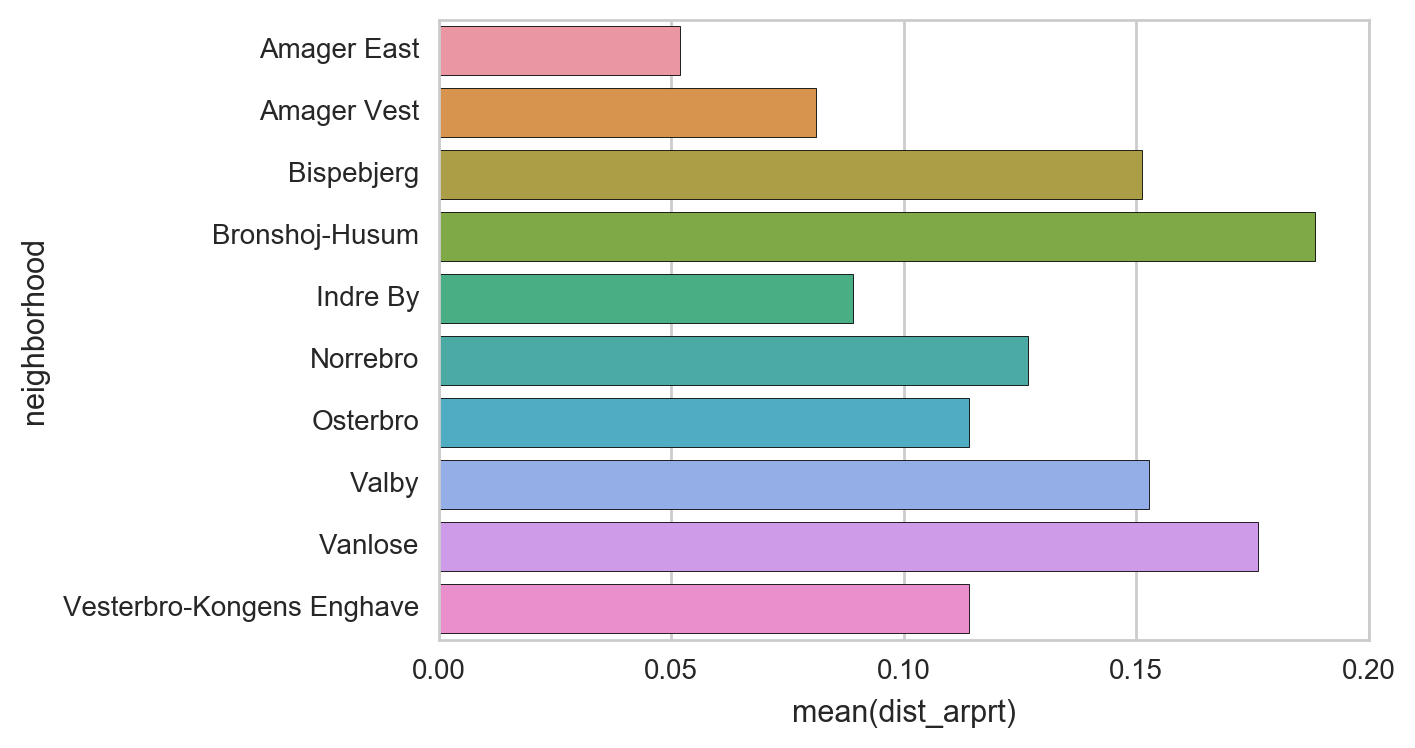

In [55]:
sns.barplot(x = df_copenhagen.dist_arprt, y = df_copenhagen.neighborhood)

In [29]:
rome = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_DataSets/Rome_Clean.csv',
                   encoding='utf8')

In [30]:
rome_nf = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_DataSets/Rome_NFeatures.csv',
                   encoding='utf8')

In [31]:
df_rome = new_dataset1(rome, rome_nf)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

In [32]:
df_rome.rename(columns ={'reviews_count':'review_count'},inplace=True)

In [33]:
df_rome = df_rome[df_rome['price'] <= 1000]
#df_rome['price'] = df_rome.price.map(lambda x: x - np.mean(df_rome.price))


In [34]:
df_rome['city'] = 'rome'
df_rome.head(2)

,bathrooms,bedrooms,bhk,dist_arprt,host_count,metrostn_count,minstay,neighborhood,overall_satisfaction,price,rest_count,reviews,review_count,room_type,city
0,1.0,0.0,1.0,0.251722,8989,13,3.0,Municipio 1,2.0,167.0,77,0,140078,Entire home/apt,rome
1,1.0,1.0,1.0,0.251722,8989,13,3.0,Municipio 1,4.5,121.0,77,20,140078,Entire home/apt,rome


In [35]:
all_cities = pd.concat([df_berlin, df_barcelona, df_copenhagen, df_paris, df_rome], ignore_index=True)

In [36]:
all_cities.head(2)

,bathrooms,bedrooms,bhk,dist_arprt,host_count,metrostn_count,minstay,neighborhood,overall_satisfaction,price,rest_count,reviews,review_count,room_type,city
0,8.0,10.0,10.0,0.057015,1206,30,1.0,Charlottenburg-Wilmersdorf,5.0,80.0,9,1,11850,Entire home/apt,berlin
1,1.0,2.0,2.0,0.057015,1206,30,3.0,Charlottenburg-Wilmersdorf,4.0,104.0,9,1,11850,Entire home/apt,berlin


In [37]:
all_cities = all_cities.reindex(np.random.permutation(all_cities.index)).reset_index(drop=True)

In [38]:
all_cities.head(2)

,bathrooms,bedrooms,bhk,dist_arprt,host_count,metrostn_count,minstay,neighborhood,overall_satisfaction,price,rest_count,reviews,review_count,room_type,city
0,1.0,1.0,1.0,0.266061,565,6,2.0,Notre-Dame-des-Champs,5.0,113.0,10,8,7423,Entire home/apt,paris
1,1.0,1.0,1.0,0.089208,2340,3,7.0,Indre By,2.0,79.0,1,2,28620,Entire home/apt,copenhagen


In [39]:
all_cities.to_csv(path_or_buf='/Users/jyots/Desktop/DS_Projects/airbnb_datasets/all_cities.csv')